<a href="https://colab.research.google.com/github/iamgarvit/image_classifier/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

170498071/170498071 [==============================] - 3s 0us/step


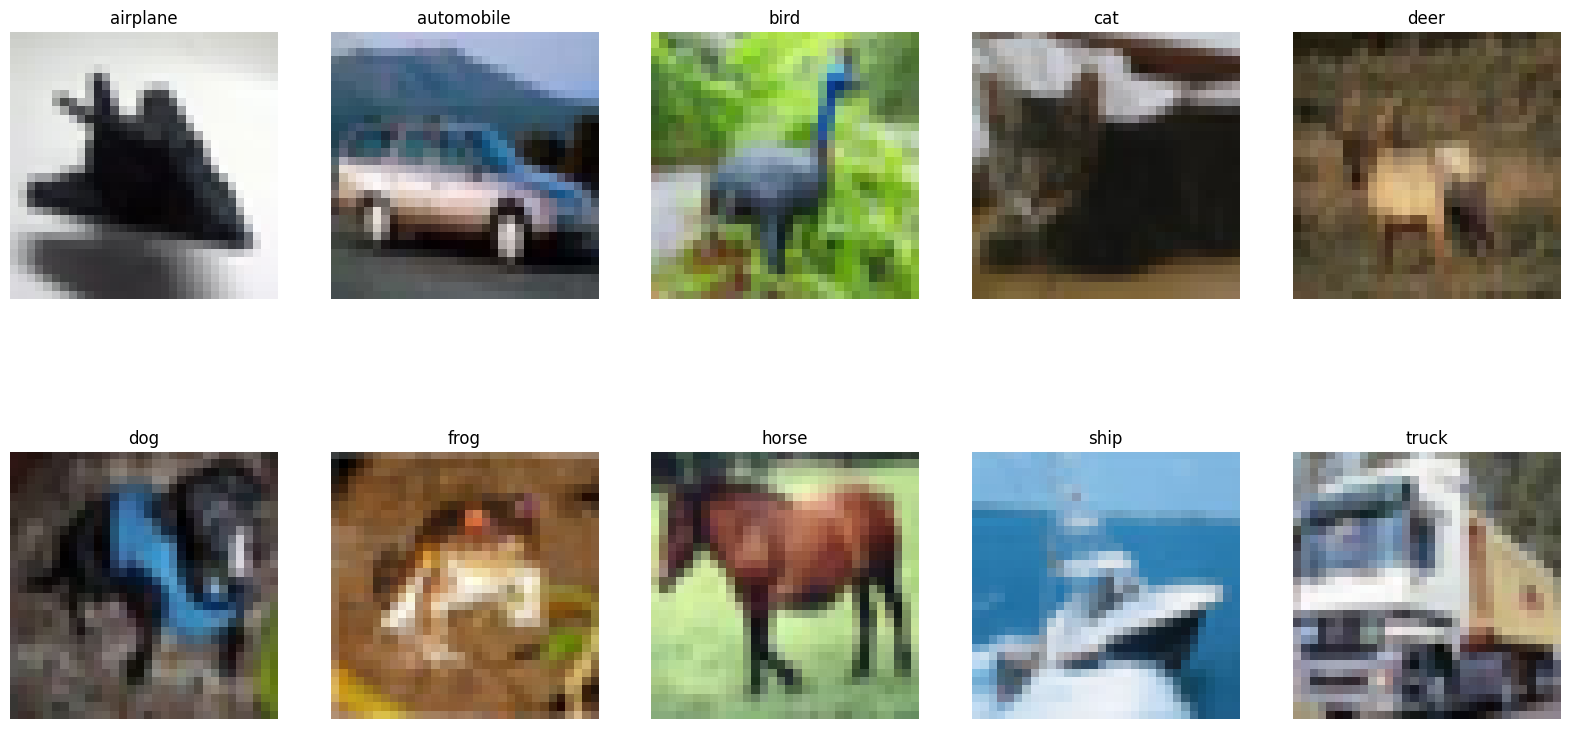

In [2]:
# Load CIFAR-10 dataset
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

# Class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display one image from each class
plt.figure(figsize=(20, 10))
for i in range(10):
    class_indices = np.where(y_train_all == i)[0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train_all[class_indices[0]])
    plt.title(class_names[i])
    plt.axis('off')
plt.show()

# Define ratios for train, validation, and test sets
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Calculate the number of samples for each set
num_train = int(len(x_train_all) * train_ratio)
num_val = int(len(x_train_all) * val_ratio)
num_test = len(x_train_all) - num_train - num_val

# Shuffle the data
indices = np.arange(len(x_train_all))
np.random.shuffle(indices)

# Split the data
x_train = x_train_all[indices[:num_train]]
y_train = y_train_all[indices[:num_train]]

x_val = x_train_all[indices[num_train:num_train+num_val]]
y_val = y_train_all[indices[num_train:num_train+num_val]]

x_test = x_train_all[indices[num_train+num_val:]]
y_test = y_train_all[indices[num_train+num_val:]]

In [3]:
# Filter classes for 5-class classification
selected_classes = [0, 1, 2, 3, 4]  # Classes: airplane, automobile, cat, deer, horse

# Filter data based on selected classes
train_filter = np.isin(y_train, selected_classes).flatten()
val_filter = np.isin(y_val, selected_classes).flatten()
test_filter = np.isin(y_test, selected_classes).flatten()

# Apply the filters to the original data
x_train_all_5 = x_train[train_filter]
y_train_all_5 = y_train[train_filter]
x_val_5 = x_val[val_filter]
y_val_5 = y_val[val_filter]
x_test_5 = x_test[test_filter]
y_test_5 = y_test[test_filter]

# Class labels for 5 classes
class_names_5 = ['airplane', 'automobile', 'bird', 'cat', 'deer']

In [4]:
# a part
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def residual_block(x, filters, strides=1):
    shortcut = x
    x = Conv2D(filters, kernel_size=3, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    if strides != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def create_resnet(input_shape, num_classes=5):
    inputs = tf.keras.Input(shape=input_shape)
    x = Conv2D(32, kernel_size=3, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = residual_block(x, filters=64, strides=2)
    x = residual_block(x, filters=64, strides=1)

    x = residual_block(x, filters=128, strides=2)
    x = residual_block(x, filters=128, strides=1)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Create the model
input_shape = x_train.shape[1:]
model = create_resnet(input_shape)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
275/275 [==============================] - 238s 866ms/step - loss: 0.3123 - accuracy: 0.8842 - val_loss: 0.9817 - val_accuracy: 0.7143
Epoch 2/10
275/275 [==============================] - 233s 847ms/step - loss: 0.2591 - accuracy: 0.9065 - val_loss: 1.5579 - val_accuracy: 0.6495
Epoch 3/10
275/275 [==============================] - 237s 861ms/step - loss: 0.2008 - accuracy: 0.9288 - val_loss: 1.5173 - val_accuracy: 0.6171
Epoch 4/10
275/275 [==============================] - 250s 911ms/step - loss: 0.1380 - accuracy: 0.9524 - val_loss: 0.8511 - val_accuracy: 0.7690
Epoch 5/10
275/275 [==============================] - 244s 887ms/step - loss: 0.1236 - accuracy: 0.9561 - val_loss: 0.7714 - val_accuracy: 0.7662
Epoch 6/10
275/275 [==============================] - 238s 868ms/step - loss: 0.0959 - accuracy: 0.9663 - val_loss: 0.7929 - val_accuracy: 0.7788
Epoch 7/10
275/275 [==============================] - 243s 885ms/step - loss: 0.0812 - accuracy: 0.9723 - val_loss: 1.7632 -

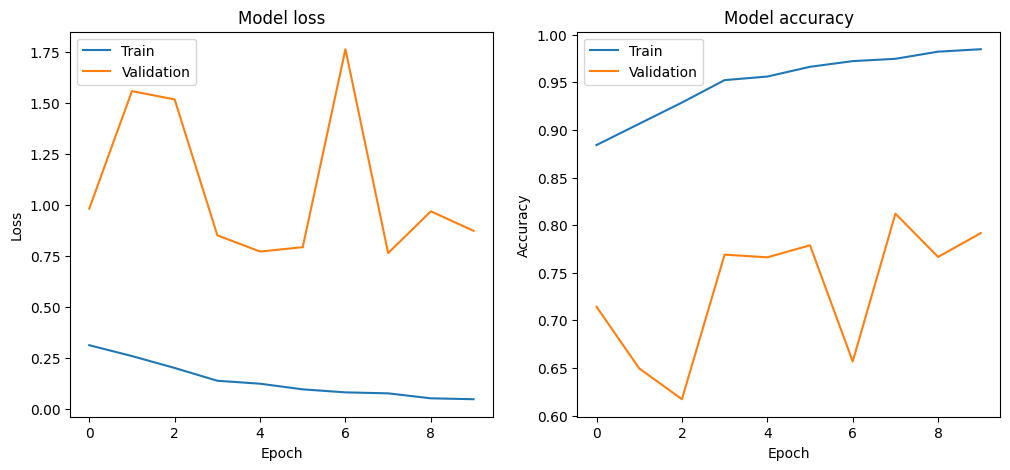

79/79 - 9s - loss: 0.7830 - accuracy: 0.7942 - 9s/epoch - 111ms/step

Test accuracy: 0.7942354083061218


In [7]:
#b part
# Define batch size and number of epochs
batch_size = 64
epochs = 10

# Train the model
history = model.fit(x_train_all_5, y_train_all_5,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val_5, y_val_5))

# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(x_test_5, y_test_5, verbose=2)
print('\nTest accuracy:', test_acc)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_44 (Conv2D)          (None, 32, 32, 64)           1792      ['input_5[0][0]']             
                                                                                                  
 batch_normalization_44 (Ba  (None, 32, 32, 64)           256       ['conv2d_44[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_36 (Activation)  (None, 32, 32, 64)           0         ['batch_normalization_44

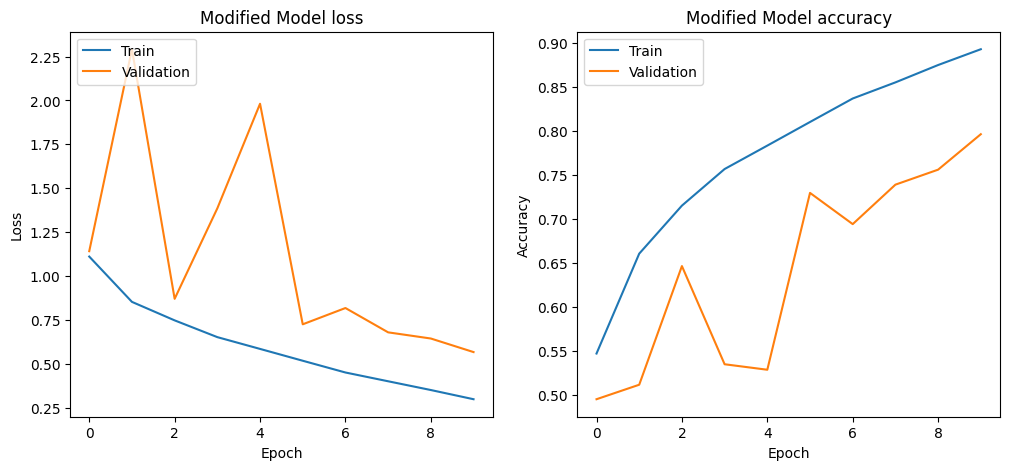

79/79 - 27s - loss: 0.5450 - accuracy: 0.8110 - 27s/epoch - 347ms/step

Modified Model test accuracy: 0.8110488653182983


In [10]:
#c part
#Here we change the number of layers to 64 and double the filters too.
#An additional dense layer is added
#Dropout layer is added for regularization

from tensorflow.keras.layers import Dropout

def create_modified_resnet(input_shape, num_classes=5):
    inputs = tf.keras.Input(shape=input_shape)
    x = Conv2D(64, kernel_size=3, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = residual_block(x, filters=128, strides=2)
    x = residual_block(x, filters=128, strides=1)

    x = residual_block(x, filters=256, strides=2)
    x = residual_block(x, filters=256, strides=1)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Creating and compiling the modified model
modified_model = create_modified_resnet(input_shape)

modified_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

modified_model.summary()

modified_history = modified_model.fit(x_train_all_5, y_train_all_5,
                                      batch_size=batch_size,
                                      epochs=epochs,
                                      validation_split=val_ratio)

# repeating step b for c part
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(modified_history.history['loss'])
plt.plot(modified_history.history['val_loss'])
plt.title('Modified Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(modified_history.history['accuracy'])
plt.plot(modified_history.history['val_accuracy'])
plt.title('Modified Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluating on test set
modified_test_loss, modified_test_acc = modified_model.evaluate(x_test_5, y_test_5, verbose=2)
print('\nModified Model test accuracy:', modified_test_acc)